In [1]:
from dataload.cifar import get_cifa10
import easydict 

args = easydict.EasyDict({
       'BATCH_SIZE':8,
       'TEST_BATCH_SIZE':4,
       'pretrain':False,
       'latent_dim':32,
       'normal_class':'airplane',        # ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
                })
dataloader_train, dataloader_vaild, dataloader_test, classes = get_cifa10(args)

100%|██████████| 170498071/170498071 [00:22<00:00, 7574059.91it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


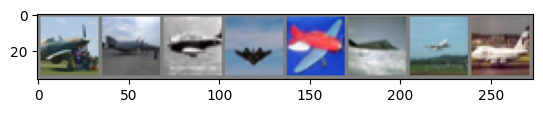

airplane airplane airplane airplane


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

#이미지 확인하기

def imshow(img):
    img = img / 2 + 0.5     # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지 뽑기
dataiter = iter(dataloader_vaild)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# 이미지별 라벨 (클래스) 보여주기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

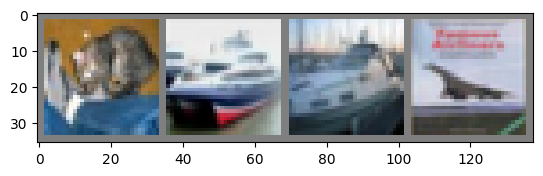

automobile automobile automobile airplane


In [3]:
# 학습용 이미지 뽑기
dataiter = iter(dataloader_test)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# 이미지별 라벨 (클래스) 보여주기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 테스트하기 

In [11]:
# 모델 불러오기 

from Networks.model1 import BasicNet, MyCNNNet, TransModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = MyCNNNet(num_classes=len(classes)).to(device)
model = TransModel(num_classes = len(classes)) # .to(device)

save_path = './weights/best_model.pth'
state_dict = torch.load(save_path)
model.load_state_dict(state_dict['net_dict'])
epoch_start = state_dict['epoch']
print('start epoch:', epoch_start)

start epoch: 14


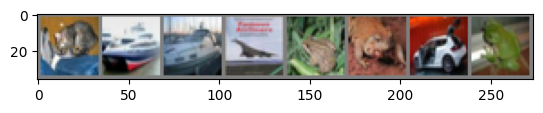

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog
Predicted:    cat  ship  deer plane  deer  frog   car  frog
Acc: 75.00 %


In [21]:
# 데이터 불러오기 
#테스트 셋은 굳이 섞을 필요가 없음
# 불러올 데이터 묶음 수 
BATCH_SIZE = 8
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

dataiter = iter(testloader)
images, labels = next(dataiter)

# 실험용 데이터와 결과 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))

# 학습한 모델로 예측값 뽑아보기

outputs = model(images).to(device)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(BATCH_SIZE)))

correct = (predicted.cpu().numpy() == labels.cpu().numpy()).sum().item()
acc = (correct / len(labels)) * 100 
print('Acc: {:.2f} %'.format(acc) )